# Example of Grid Search and Random Search in ANN

In [3]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import tensorflow.keras.activations as activations
import matplotlib.pyplot as plt
from sklearn import model_selection as ms

In [4]:
class Classifier(keras.Model):
    def __init__(self):
        super(Classifier, self).__init__()

        self.dense0 = layers.Dense(256, activation='relu')
        self.dense1 = layers.Dense(128, activation='relu')
        self.dense2 = layers.Dense(10, activation='softmax')

    def call(self, x):
        h = self.dense0(x)
        h = self.dense1(h)
        h = self.dense2(h)
        return h

model = Classifier()
model.build(input_shape = (None,784))
model.summary()

C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'classifier_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "classifier_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
#Load and preprocess MNIST dataset
#Flatten the images and normalize pixel values to [0, 1]    

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1,28*28)/255
x_test = x_test.reshape(-1,28*28)/255

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [6]:
x_train,x_val,y_train,y_val=ms.train_test_split(x_train,y_train, test_size=0.15)

print("Train",x_train.shape,y_train.shape)
print("Test",x_test.shape,y_test.shape)
print("Validation",x_val.shape,y_val.shape)

Train (51000, 784) (51000,)
Test (10000, 784) (10000,)
Validation (9000, 784) (9000,)


In [7]:
#defining the function to train the model with different hyperparameters
#batch_size, learning_rate, epochs
def train_model(batch_size, learning_rate, epochs=5):
    print(f'Training model with batch_size {batch_size} and learning_rate {learning_rate}')

    model = Classifier()
    model.build(input_shape = (None,784))
    model.compile(optimizer = keras.optimizers.Adam(learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    #training model
    model.fit(x_train,y_train, batch_size=batch_size, epochs=epochs)
    #testing model
    loss, accuracy = model.evaluate(x=x_test, y=y_test, verbose=2)
    # print(f'Accuracy of the Model on test dataset = {accuracy}')
    print()
    return model, accuracy

## Grid Search

In [8]:
### Grid Search
# lrs = np.array([0.1, 0.03, 0.01, 0.003, 0.001])
powers = np.linspace(-1, -4, num=5)
lrs = np.power(10, powers)

bss = np.array([2**i for i in range(3, 11, 2)]) ## Batch sizes
lr_grid, bs_grid = np.meshgrid(lrs, bss) ## Grid of learning rates and batch sizes
lr_grid = lr_grid.reshape(-1)
bs_grid = bs_grid.reshape(-1)

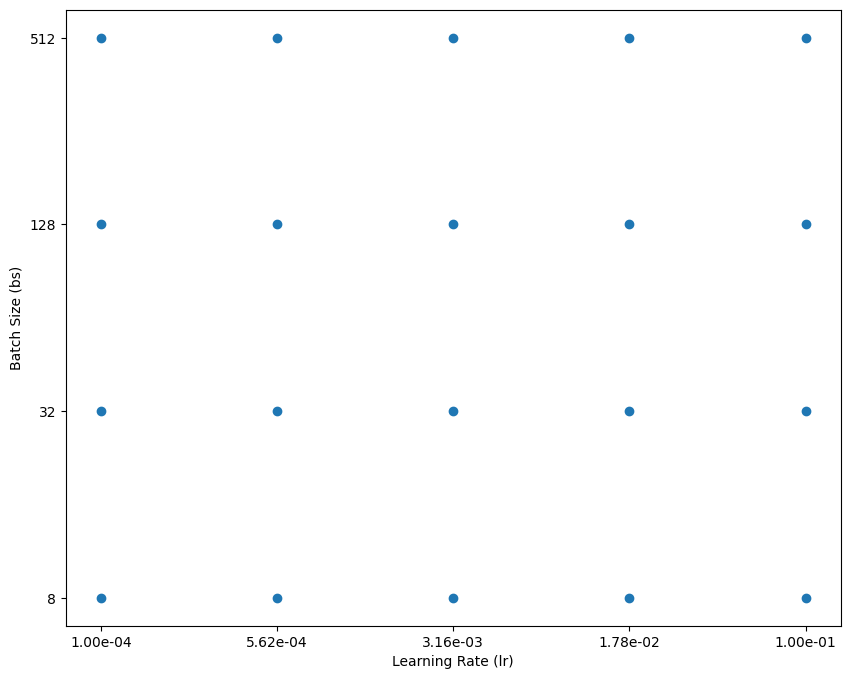

In [9]:
plt.figure(figsize=(10,8))
plt.scatter(np.log10(lr_grid), np.log2(bs_grid))
plt.yticks(np.log2(bss), labels=[i for i in bss])
plt.xticks(np.log10(lrs), labels=[f'{i:.2e}' for i in lrs])
plt.xlabel('Learning Rate (lr)')
plt.ylabel('Batch Size (bs)')
plt.show()

In [10]:
#training the model with different hyperparameters
acc_list = np.zeros(shape=len(lr_grid))
best_accuracy = 0.
best_model = None
for i in range(len(lr_grid)):
    batch_size = bs_grid[i]
    learning_rate = lr_grid[i]

    model, acc = train_model(batch_size, learning_rate, epochs=2)
    acc_list[i] = acc
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model

Training model with batch_size 8 and learning_rate 0.1


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'classifier_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/2
6375/6375 ━━━━━━━━━━━━━━━━━━━━ 75s 11ms/step - accuracy: 0.1142 - loss: 2.6050
Epoch 2/2
6375/6375 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.1013 - loss: 2.3276
313/313 - 1s - 2ms/step - accuracy: 0.1028 - loss: 2.3134

Training model with batch_size 8 and learning_rate 0.01778279410038923
Epoch 1/2


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'classifier_3', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


6375/6375 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8178 - loss: 0.7003
Epoch 2/2
6375/6375 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.8968 - loss: 0.4535
313/313 - 1s - 2ms/step - accuracy: 0.9047 - loss: 0.4527

Training model with batch_size 8 and learning_rate 0.0031622776601683794
Epoch 1/2


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'classifier_4', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


6375/6375 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.8865 - loss: 0.3650
Epoch 2/2
6375/6375 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.9587 - loss: 0.1470
313/313 - 1s - 2ms/step - accuracy: 0.9606 - loss: 0.1379

Training model with batch_size 8 and learning_rate 0.0005623413251903491
Epoch 1/2


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'classifier_5', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


6375/6375 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.8942 - loss: 0.3610
Epoch 2/2
6375/6375 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9731 - loss: 0.0897
313/313 - 1s - 3ms/step - accuracy: 0.9593 - loss: 0.1284

Training model with batch_size 8 and learning_rate 0.0001


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'classifier_6', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/2
6375/6375 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8342 - loss: 0.6311
Epoch 2/2
6375/6375 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9529 - loss: 0.1635
313/313 - 1s - 2ms/step - accuracy: 0.9648 - loss: 0.1190

Training model with batch_size 32 and learning_rate 0.1
Epoch 1/2


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'classifier_7', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3452 - loss: 3.1848
Epoch 2/2
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2451 - loss: 1.9824
313/313 - 1s - 2ms/step - accuracy: 0.1918 - loss: 2.0422

Training model with batch_size 32 and learning_rate 0.01778279410038923
Epoch 1/2


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'classifier_8', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8562 - loss: 0.5130
Epoch 2/2
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9300 - loss: 0.2695
313/313 - 1s - 2ms/step - accuracy: 0.9363 - loss: 0.2487

Training model with batch_size 32 and learning_rate 0.0031622776601683794
Epoch 1/2


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'classifier_9', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8977 - loss: 0.3324
Epoch 2/2
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9666 - loss: 0.1093
313/313 - 1s - 2ms/step - accuracy: 0.9703 - loss: 0.0968

Training model with batch_size 32 and learning_rate 0.0005623413251903491
Epoch 1/2


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'classifier_10', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8698 - loss: 0.4541
Epoch 2/2
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9683 - loss: 0.1045
313/313 - 1s - 2ms/step - accuracy: 0.9724 - loss: 0.0886

Training model with batch_size 32 and learning_rate 0.0001
Epoch 1/2


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'classifier_11', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7714 - loss: 0.8890
Epoch 2/2
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9392 - loss: 0.2231
313/313 - 1s - 2ms/step - accuracy: 0.9463 - loss: 0.1805

Training model with batch_size 128 and learning_rate 0.1
Epoch 1/2


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'classifier_12', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2893 - loss: 4.2834
Epoch 2/2
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5280 - loss: 1.2828
313/313 - 1s - 2ms/step - accuracy: 0.6211 - loss: 1.1677

Training model with batch_size 128 and learning_rate 0.01778279410038923


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'classifier_13', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/2
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8514 - loss: 0.5145
Epoch 2/2
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9535 - loss: 0.1608
313/313 - 1s - 2ms/step - accuracy: 0.9586 - loss: 0.1452

Training model with batch_size 128 and learning_rate 0.0031622776601683794
Epoch 1/2


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'classifier_14', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8749 - loss: 0.4143
Epoch 2/2
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9692 - loss: 0.0981
313/313 - 1s - 2ms/step - accuracy: 0.9654 - loss: 0.1153

Training model with batch_size 128 and learning_rate 0.0005623413251903491
Epoch 1/2


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'classifier_15', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8154 - loss: 0.6776
Epoch 2/2
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9548 - loss: 0.1563
313/313 - 1s - 2ms/step - accuracy: 0.9638 - loss: 0.1159

Training model with batch_size 128 and learning_rate 0.0001
Epoch 1/2


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'classifier_16', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6139 - loss: 1.3728
Epoch 2/2
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9112 - loss: 0.3212
313/313 - 1s - 2ms/step - accuracy: 0.9284 - loss: 0.2501

Training model with batch_size 512 and learning_rate 0.1
Epoch 1/2


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'classifier_17', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4474 - loss: 8.7870
Epoch 2/2
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6401 - loss: 0.9861
313/313 - 1s - 2ms/step - accuracy: 0.7888 - loss: 0.7413

Training model with batch_size 512 and learning_rate 0.01778279410038923


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'classifier_18', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/2
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7361 - loss: 1.0409
Epoch 2/2
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9549 - loss: 0.1438
313/313 - 1s - 2ms/step - accuracy: 0.9571 - loss: 0.1418

Training model with batch_size 512 and learning_rate 0.0031622776601683794
Epoch 1/2


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'classifier_19', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8137 - loss: 0.6257
Epoch 2/2
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9642 - loss: 0.1224
313/313 - 1s - 3ms/step - accuracy: 0.9666 - loss: 0.1110

Training model with batch_size 512 and learning_rate 0.0005623413251903491
Epoch 1/2


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'classifier_20', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6973 - loss: 1.1071
Epoch 2/2
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9319 - loss: 0.2376
313/313 - 1s - 3ms/step - accuracy: 0.9445 - loss: 0.1835

Training model with batch_size 512 and learning_rate 0.0001


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'classifier_21', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Epoch 1/2
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.3911 - loss: 1.9615
Epoch 2/2
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8525 - loss: 0.6769
313/313 - 1s - 3ms/step - accuracy: 0.8971 - loss: 0.4164



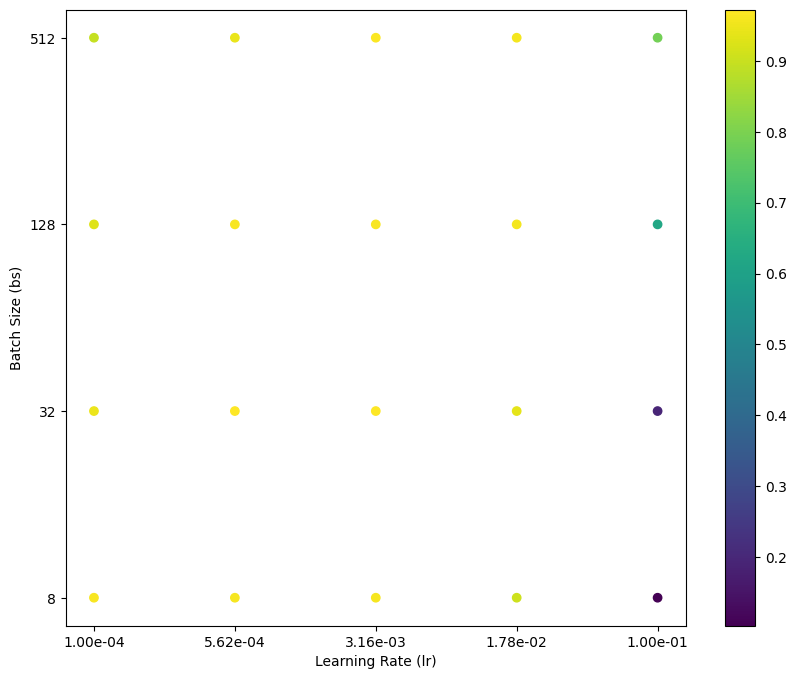

In [11]:
# Plotting the results
plt.figure(figsize=(10,8))
plt.scatter(np.log10(lr_grid), np.log2(bs_grid), c=acc_list)
plt.yticks(np.log2(bss), labels=[i for i in bss])
plt.xticks(np.log10(lrs), labels=[f'{i:.2e}' for i in lrs])
plt.xlabel('Learning Rate (lr)')
plt.ylabel('Batch Size (bs)')
plt.colorbar()
plt.show()

In [12]:
best = acc_list.argmax()
print(f'Best accuracy {best_accuracy} with batch size {bs_grid[best]} learning rate {lr_grid[best]}')

Best accuracy 0.9724000096321106 with batch size 32 learning rate 0.0005623413251903491
